<a href="https://colab.research.google.com/github/Mhtag/tensorflow/blob/main/03_neuralnetwork_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt



## Creating the data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# make 1000 samples
n_samples = 1000

# Create Circles
X, y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [ ]:
# check the features
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [ ]:
# check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
import pandas as pd

circles = pd.DataFrame({'X0':X[:,0],'X1':X[:,1],'label':y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


### Vizualize the dataset

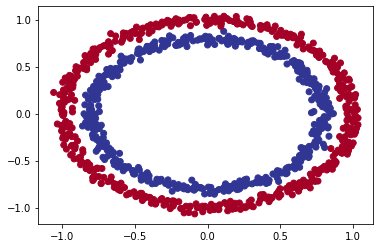

In [ ]:
# visualize witha plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu)

### Input Shapes and output shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

## Model

In [ ]:
tf.random.set_seed(42)

model1 = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['accuracy'])

model1.fit(X, y, epochs=200)

Epoch 1/200
32/32 [==============================] - 1s 1ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/200
32/32 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4830
Epoch 6/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4990
Epoch 7/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.4880
Epoch 8/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.4950
Epoch 9/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.4840
Epoch 10/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4820
Epoch 11/

In [ ]:
model1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

In [ ]:
# lets improve our model

tf.random.set_seed(42)

model2 = tf.keras.Sequential([
                              tf.keras.layers.Dense(1),
                              tf.keras.layers.Dense(1)
])

model2.compile(loss= tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['accuracy'])

model2.fit(X,y,epochs=100, verbose=0)

model2.evaluate(X,y)

32/32 [==============================] - 0s 986us/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

### Improving our model

In [ ]:
tf.random.set_seed(42)

model3 = tf.keras.Sequential([
                              tf.keras.layers.Dense(100),
                              tf.keras.layers.Dense(10),
                              tf.keras.layers.Dense(1)
])

model3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

#fit the model
model3.fit(X,y,epochs=100, verbose=0)

# Evaluate the model
model3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980254650115967, 0.5080000162124634]

To vizualize our model prediction



In [ ]:
import numpy as np

In [ ]:


def plot_decision_boundary(model, X, y):

  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min,y_max, 100))
  
  # create x value (we're going to make prediction on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make Predictions

  y_pred = model.predict(x_in)

  # check for multiclass 

  if len(y_pred[0]) > 1:
    print('doing multiclass classification')
    # we have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print('doing binary classification')
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0], X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [ ]:
x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1

x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

In [ ]:
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min,y_max, 100))
xx, yy

(array([[-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        ...,
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175]]),
 array([[-1.16776832, -1.16776832, -1.16776832, ..., -1.16776832,
         -1.16776832, -1.16776832],
        [-1.14449789, -1.14449789, -1.14449789, ..., -1.14449789,
         -1.14449789, -1.14449789],
        [-1.12122747, -1.12122747, -1.12122747, ..., -1.12122747,
         -1.12122747, -1.12122747],
        ...,
        [ 1.08946283,  1.08946283,  1.08946283, ...,  

In [ ]:
x_in = np.c_[xx.ravel(), yy.ravel()]
x_in

array([[-1.15950246, -1.16776832],
       [-1.13633868, -1.16776832],
       [-1.1131749 , -1.16776832],
       ...,
       [ 1.08738419,  1.13600368],
       [ 1.11054797,  1.13600368],
       [ 1.13371175,  1.13600368]])

doing binary classification


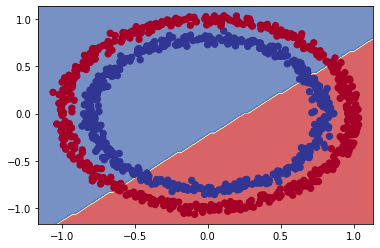

In [ ]:
plot_decision_boundary(model=model3,X=X,y=y)

In [ ]:
tf.random.set_seed(42)

model4 = tf.keras.Sequential([
                              tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

model4.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

history = model4.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/

doing binary classification


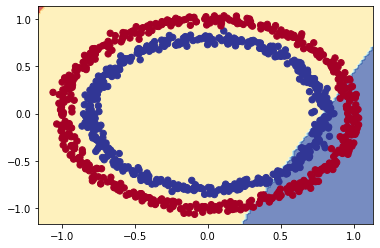

In [ ]:
plot_decision_boundary(model=model4,
                       X=X,y=y)

### Model 5

In [ ]:
tf.random.set_seed(42)

model5 = tf.keras.Sequential([
                              tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
                              tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
                              tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

history = model5.fit(X,y,epochs=120)

Epoch 1/120
32/32 [==============================] - 0s 1ms/step - loss: 0.6912 - accuracy: 0.5020
Epoch 2/120
32/32 [==============================] - 0s 1ms/step - loss: 0.6898 - accuracy: 0.5070
Epoch 3/120
32/32 [==============================] - 0s 1ms/step - loss: 0.6883 - accuracy: 0.5140
Epoch 4/120
32/32 [==============================] - 0s 1ms/step - loss: 0.6872 - accuracy: 0.5130
Epoch 5/120
32/32 [==============================] - 0s 1ms/step - loss: 0.6860 - accuracy: 0.5140
Epoch 6/120
32/32 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.5180
Epoch 7/120
32/32 [==============================] - 0s 1ms/step - loss: 0.6831 - accuracy: 0.5270
Epoch 8/120
32/32 [==============================] - 0s 2ms/step - loss: 0.6819 - accuracy: 0.5320
Epoch 9/120
32/32 [==============================] - 0s 1ms/step - loss: 0.6804 - accuracy: 0.5340
Epoch 10/120
32/32 [==============================] - 0s 1ms/step - loss: 0.6791 - accuracy: 0.5420
Epoch 11/

doing binary classification


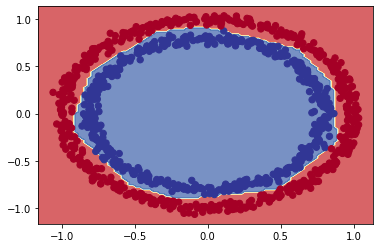

In [ ]:
plot_decision_boundary(model=model5,X=X,y=y)

### plot the training loss curve


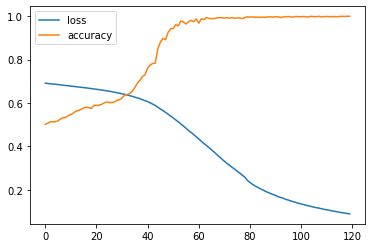

In [ ]:
pd.DataFrame(history.history).plot()

## Finding the best learning rate

* A learning rate **Callback**.
* A modified loss curve plot.

In [ ]:
tf.random.set_seed(42)

model6 = tf.keras.Sequential([
                              tf.keras.layers.Dense(4, activation='relu'),
                              tf.keras.layers.Dense(4, activation='relu'),
                              tf.keras.layers.Dense(1, activation='sigmoid')
])

model6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer='Adam',
               metrics=['accuracy'])

# create a learning rate call back
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the Model
history6 = model6.fit(X,y,epochs=100, callbacks=[lr_schedular])

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6910 - accuracy: 0.4990
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6902 - accuracy: 0.4990
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6894 - accuracy: 0.5060
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6885 - accuracy: 0.5120
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6876 - accuracy: 0.5050
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6867 - accuracy: 0.5120
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6858 - accuracy: 0.5120
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6850 - accuracy: 0.5130
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6841 - accuracy: 0.5270
Epoch 11/

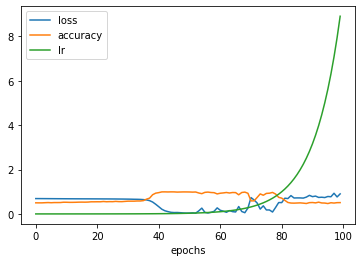

In [ ]:
pd.DataFrame(history6.history).plot(xlabel='epochs')

Text(0.5, 1.0, 'loss vs learning rate')

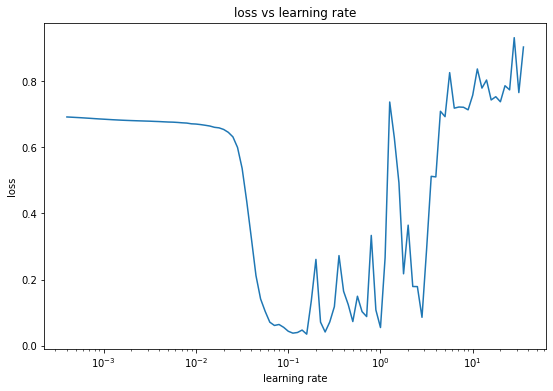

In [ ]:
# plot the learning rate versus the loss
lrs = 1e-4 * 4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(9,6))
plt.semilogx(lrs, history6.history['loss'])
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.title('loss vs learning rate')

In [ ]:
tf.random.set_seed(42)

model7 = tf.keras.Sequential([
                              tf.keras.layers.Dense(4, activation='relu'),
                              tf.keras.layers.Dense(4, activation='relu'),
                              tf.keras.layers.Dense(1, activation='sigmoid')
])

model7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(lr=0.007),
               metrics=['accuracy'])

history7 = model7.fit(X , y, epochs=20)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
32/32 [==============================] - 0s 1ms/step - loss: 0.6842 - accuracy: 0.5370
Epoch 2/20
32/32 [==============================] - 0s 1ms/step - loss: 0.6779 - accuracy: 0.5610
Epoch 3/20
32/32 [==============================] - 0s 1ms/step - loss: 0.6744 - accuracy: 0.5480
Epoch 4/20
32/32 [==============================] - 0s 1ms/step - loss: 0.6691 - accuracy: 0.5770
Epoch 5/20
32/32 [==============================] - 0s 1ms/step - loss: 0.6650 - accuracy: 0.5620
Epoch 6/20
32/32 [==============================] - 0s 1ms/step - loss: 0.6606 - accuracy: 0.5700
Epoch 7/20
32/32 [==============================] - 0s 1ms/step - loss: 0.6550 - accuracy: 0.6100
Epoch 8/20
32/32 [==============================] - 0s 1ms/step - loss: 0.6485 - accuracy: 0.5830
Epoch 9/20
32/32 [==============================] - 0s 1ms/step - loss: 0.6395 - accuracy: 0.5940
Epoch 10/20
32/32 [==============================] - 0s 1ms/step - loss: 0.6228 - accuracy: 0.6940
Epoch 11/20
32/32 [

doing binary classification


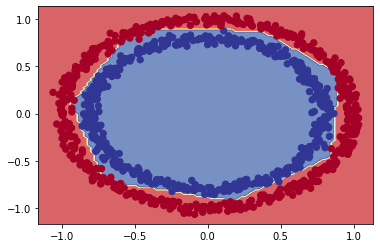

In [ ]:
plot_decision_boundary(model=model7,X=X,y=y)